 **`K Means` Algorithm & `Elbow` Method:**

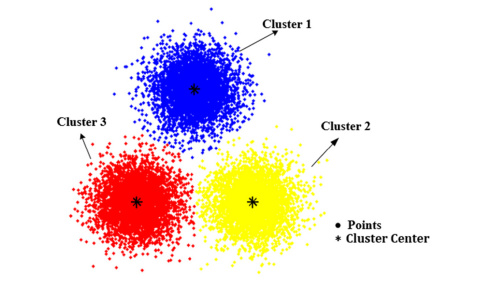

`K means is one of the most popular Unsupervised Machine Learning Algorithms Used for Solving Classification Problems. K Means segregates the unlabeled data into various groups, called clusters, based on having similar features, common patterns.`

**What Is K Means Algorithm:** `Kmeans Algorithm is an Iterative algorithm that divides a group of n datasets into k subgroups /clusters based on the similarity and their mean distance from the centroid of that particular subgroup/ formed.` 


`K, here is the pre-defined number of clusters to be formed by the Algorithm. If K=3, It means the number of clusters to be formed from the dataset is 3.`

*To upload `.csv` file from my local drive:*

In [1]:
from google.colab import files
uploaded = files.upload()

Saving income.csv to income.csv


**Print the `Data Frame`:**

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

import io
df = pd.read_csv(io.BytesIO(uploaded['income.csv']))
# print(df)

pd.set_option('display.max_columns', None)
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


**Visualise the data using `Scatter plot`:**

Text(0, 0.5, 'Income($)')

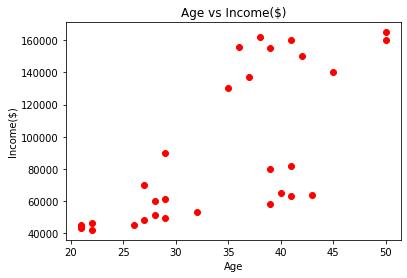

In [107]:
x=df['Age']
y= df['Income($)']

plt.title("Age vs Income($)")
plt.scatter(x, y, c='r')
plt.xlabel('Age')
plt.ylabel('Income($)')

**Make `3 cluster` based on the above `scatter plot`:**

In [108]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 0, 0, 0], dtype=int32)

**Add the `'cluster'` column on the orginal data set:**

In [109]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


**`Cluster Centers:`**

In [110]:
km.cluster_centers_

array([[4.130e+01, 1.515e+05],
       [3.560e+01, 6.930e+04],
       [2.490e+01, 4.665e+04]])

**Make `3` new data frame based on the: `cluster==0`; `cluster==1`; `cluster==2`**

In [111]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

Look the **`df0`** Data Frame:

In [112]:
df0.head()

,Name,Age,Income($),cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0


Look the **`df1`** Data Frame:

In [113]:
df1.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
16,Dipika,40,65000,1


Look the **`df2`** Data Frame:

In [114]:
df2.head()

,Name,Age,Income($),cluster
11,Tom,26,45000,2
12,Arnold,27,48000,2
13,Jared,28,51000,2
14,Stark,29,49500,2
15,Ranbir,32,53000,2


Drow scatter plot of 3 `Cluster` & `cluster_centers_`:

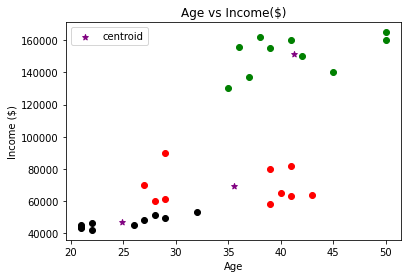

In [115]:
plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.title("Age vs Income($)")
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

**Drop `cluster` Column:**

In [116]:
df.drop('cluster', axis='columns', inplace=True)

**This is not a good `cluster_centers_`; That's why i `use min max scaler`. It modifide all data *`within 0 to 1`*. So, repeat once again with the same process:**

In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [86]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

*Modified `Data Frame`:*

In [87]:
df.head(10)

,Name,Age,Income($)
0,Rob,0.206897,0.227642
1,Michael,0.275862,0.390244
2,Mohan,0.275862,0.154472
3,Ismail,0.241379,0.146341
4,Kory,0.724138,0.878049
5,Gautam,0.620690,0.918699
6,David,0.689655,0.959350
7,Andrea,0.586207,0.975610
8,Brad,0.517241,0.926829
9,Angelina,0.482759,0.715447


**Visualise the Modifide data using `Scatter plot`:**

Text(0, 0.5, 'Income($)')

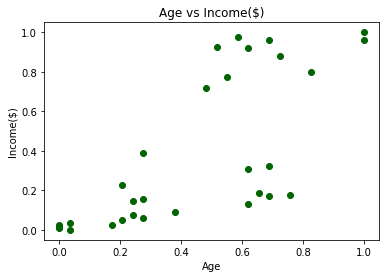

In [88]:
x=df['Age']
y= df['Income($)']

plt.title("Age vs Income($)")
plt.scatter(x, y, c='darkgreen')
plt.xlabel('Age')
plt.ylabel('Income($)')

**Make `3 cluster` based on the above `scatter plot`:**

In [89]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 1, 1, 1], dtype=int32)

**Add the `cluster` column on the Modifide data set:**

In [91]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.206897,0.227642,2
1,Michael,0.275862,0.390244,2
2,Mohan,0.275862,0.154472,2
3,Ismail,0.241379,0.146341,2
4,Kory,0.724138,0.878049,1


**`Cluster Centers:`**

In [93]:
km.cluster_centers_

array([[0.67241379, 0.21680217],
       [0.7       , 0.8902439 ],
       [0.16748768, 0.09262485]])

**Make `3` new data frame based on the: `cluster==0`; `cluster==1`; `cluster==2`**

In [94]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

**Look the `df0` Data Frame:**

In [95]:
df0.head()

,Name,Age,Income($),cluster
16,Dipika,0.655172,0.186992,0
17,Priyanka,0.689655,0.170732,0
18,Nick,0.758621,0.178862,0
19,Alia,0.620690,0.308943,0
20,Sid,0.689655,0.325203,0


**Look the `df1` Data Frame:**

In [96]:
df1.head()

,Name,Age,Income($),cluster
4,Kory,0.724138,0.878049,1
5,Gautam,0.620690,0.918699,1
6,David,0.689655,0.959350,1
7,Andrea,0.586207,0.975610,1
8,Brad,0.517241,0.926829,1


**Look the `df2` Data Frame:**

In [98]:
df2.tail()

,Name,Age,Income($),cluster
22,Amarta,0.000000,0.02439,2
23,Abhishek,0.000000,0.01626,2
24,Adnan,0.034483,0.00000,2
25,Pabitra,0.034483,0.03252,2
26,Amit,0.000000,0.00813,2


**Drow scatter plot of `3 Cluster` & `cluster_centers_`:**

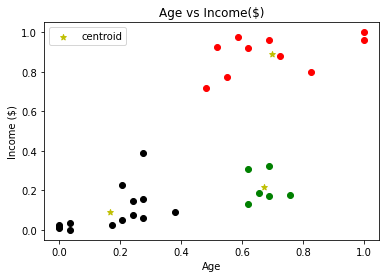

In [100]:
plt.scatter(df0.Age,df0['Income($)'],color='green')
plt.scatter(df1.Age,df1['Income($)'],color='red')
plt.scatter(df2.Age,df2['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='y',marker='*',label='centroid')

plt.title("Age vs Income($)")
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

**`Elbow Plot:`**

In [102]:

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

**`K` vs `Sum of squared error` Plot:**

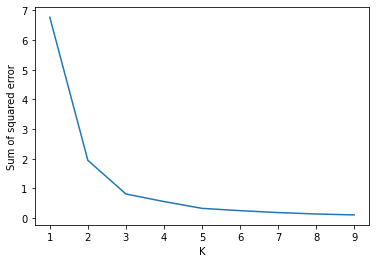

In [103]:
plt.title("K vs Sum of squared error")
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

[**`AMARTA KUNDU:)`**](https://github.com/AMARTA7)

In [117]:
print("Made by AMARTA KUNDU. IT, JISCE.")

Made by AMARTA KUNDU. IT, JISCE.
